In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Learnbay 8.30-12\\LogisticRegression'

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
train['data']= 'train'
test['data'] = 'test'

In [8]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
data             0
dtype: int64

In [9]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [50]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
data             0
dtype: int64

In [10]:
all_data = pd.concat([train, test], axis=0)

In [11]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [12]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [13]:
all_data.shape

(1309, 13)

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


# Pre-processing required

In [15]:
# step 1 : check missing data
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [16]:
# Cabin data has 77% missing - so we have to drop this column
all_data = all_data.drop(['Cabin'], axis=1)

In [17]:
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [18]:
all_data.shape

(1309, 12)

<AxesSubplot:ylabel='Age'>

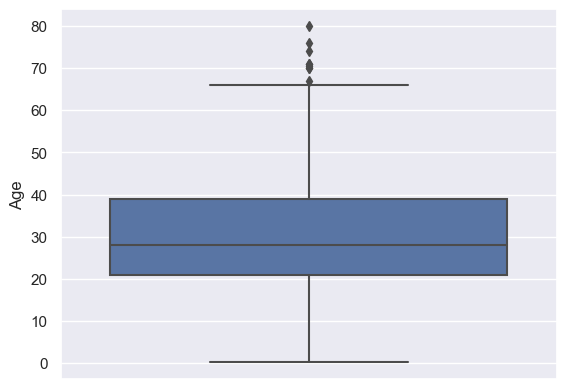

In [19]:
# Age - num
sns.boxplot(y='Age', data=all_data)

In [20]:
all_data['Age'].mean()

29.881137667304014

In [21]:
all_data['Age'].median()

28.0

In [22]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [23]:
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [24]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'data'],
      dtype='object')

In [ ]:
# certain variables are non-significant and hence we have to drop them
# PassengerID, Name, Ticket, Fare

In [25]:
all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [27]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [30]:
all_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [31]:
549+342

891

In [33]:
train['Survived'].isnull().sum()

0

In [ ]:
# handling missing value is completed

# Encoding required

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [36]:
all_data = pd.get_dummies(all_data, columns=['Pclass'])

In [37]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3
0,0.0,male,22.0,1,0,S,train,0,0,1
1,1.0,female,38.0,1,0,C,train,1,0,0
2,1.0,female,26.0,0,0,S,train,0,0,1
3,1.0,female,35.0,1,0,S,train,1,0,0
4,0.0,male,35.0,0,0,S,train,0,0,1


In [38]:
all_data = pd.get_dummies(all_data, columns=['Sex'])

In [39]:
all_data.head()

,Survived,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,S,train,0,0,1,0,1
1,1.0,38.0,1,0,C,train,1,0,0,1,0
2,1.0,26.0,0,0,S,train,0,0,1,1,0
3,1.0,35.0,1,0,S,train,1,0,0,1,0
4,0.0,35.0,0,0,S,train,0,0,1,0,1


In [40]:
all_data = pd.get_dummies(all_data, columns=['Embarked'])

In [44]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,train,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,train,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,train,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,train,0,0,1,0,1,0,0,1


In [45]:
# Dummy variable (n-1)
all_data = all_data.drop(['Pclass_1','Sex_female','Embarked_C'], axis=1)

In [46]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,1,1,0,1
1,1.0,38.0,1,0,train,0,0,0,0,0
2,1.0,26.0,0,0,train,0,1,0,0,1
3,1.0,35.0,1,0,train,0,0,0,0,1
4,0.0,35.0,0,0,train,0,1,1,0,1


In [49]:
all_data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

<AxesSubplot:ylabel='SibSp'>

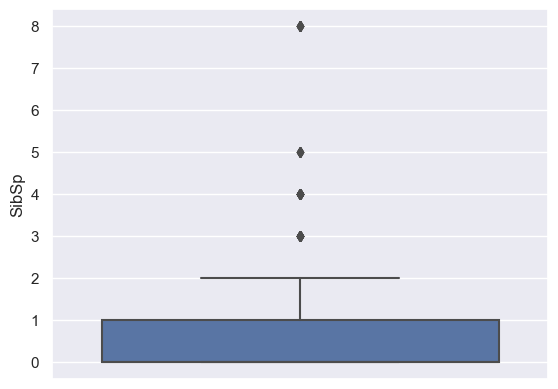

In [48]:
sns.boxplot(y='SibSp', data=all_data)

In [ ]:
# Outlier treatement - there is no outlier found in the dataset (Age range is correct)
# since, it's logistic regression, hence there is no need to handle outlier

In [ ]:
# Part 4 - feature scaling - hold it, if your accuracy is not good, then we have to do feature scaling as well

In [58]:
train.duplicated().sum()

0

In [57]:
test.duplicated().sum()

0

In [59]:
# Segregate train and test 
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [60]:
train.shape

(891, 10)

In [61]:
test.shape

(418, 10)

In [63]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [64]:
train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0,1,1,0,1
1,1.0,38.0,1,0,0,0,0,0,0
2,1.0,26.0,0,0,0,1,0,0,1
3,1.0,35.0,1,0,0,0,0,0,1
4,0.0,35.0,0,0,0,1,1,0,1


In [66]:
# split the data into independent and dependent variable 
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [67]:
x.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1


In [68]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [65]:
test.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,0,1,1,1,0
1,NaN,47.0,1,0,0,1,0,0,1
2,NaN,62.0,0,0,1,0,1,1,0
3,NaN,27.0,0,0,0,1,1,0,1
4,NaN,22.0,1,1,0,1,0,0,1


In [69]:
x1 = test.drop(['Survived'], axis=1)
y1 = test['Survived']

In [70]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [71]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [72]:
# Last preprocessing part - Imbalance data check
# it's balance dataset
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [ ]:
### This is all about preprocessing part

# Exploratory Data Analysis - EDA

In [73]:
for i in all_data.columns:
    print("****************************************************", i , 
          "*****************************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()
    

**************************************************** Survived *****************************************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


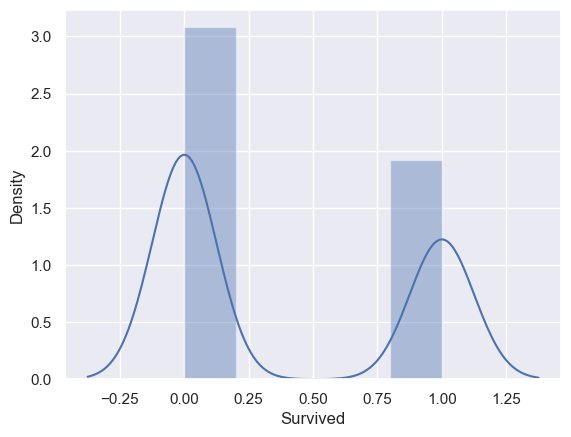

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


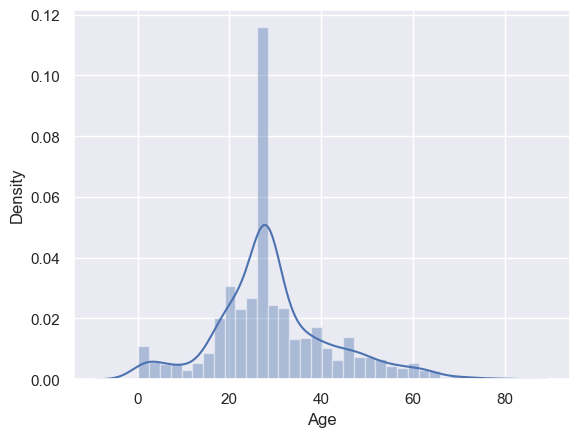

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


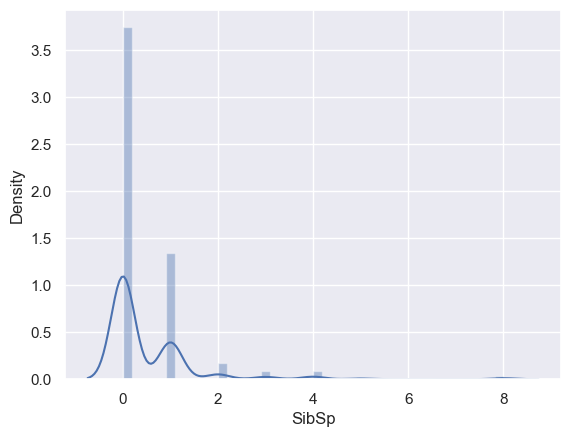

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


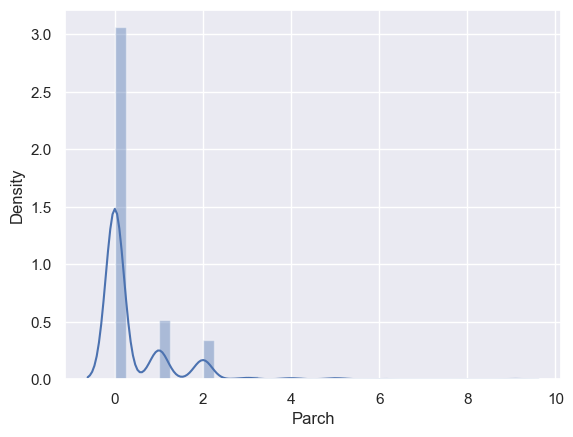

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


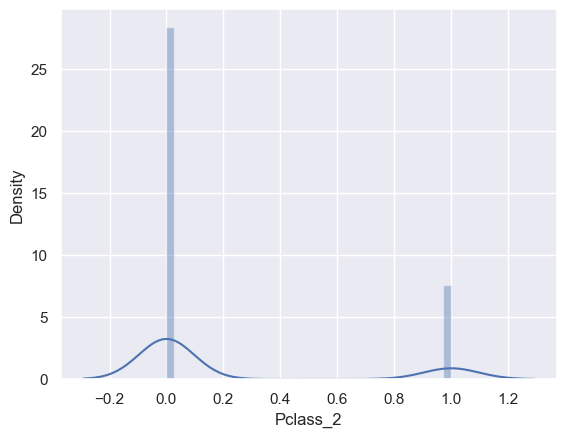

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


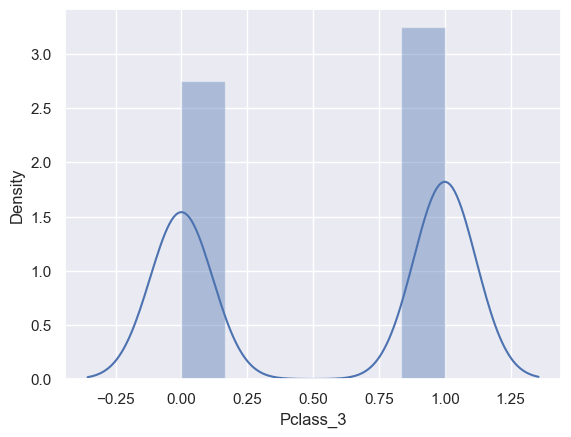

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


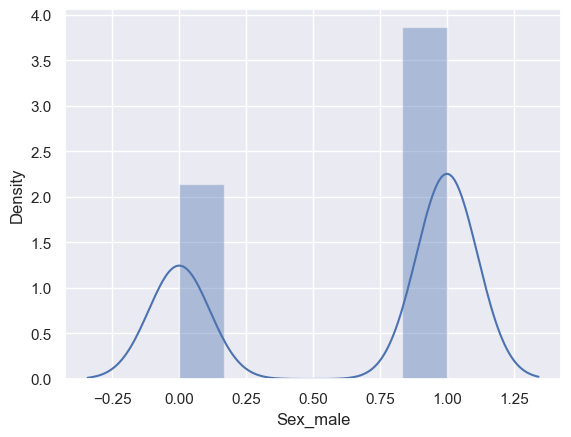

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


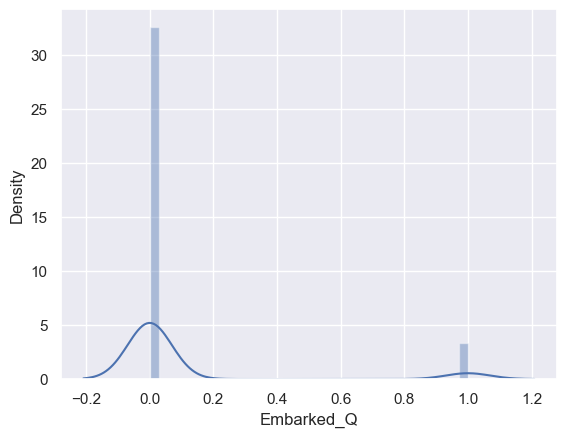

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


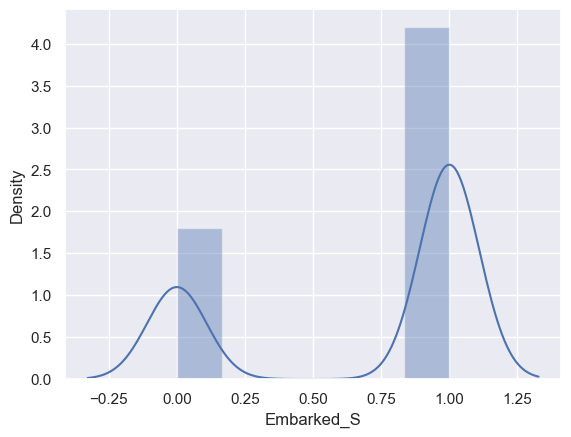

In [74]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


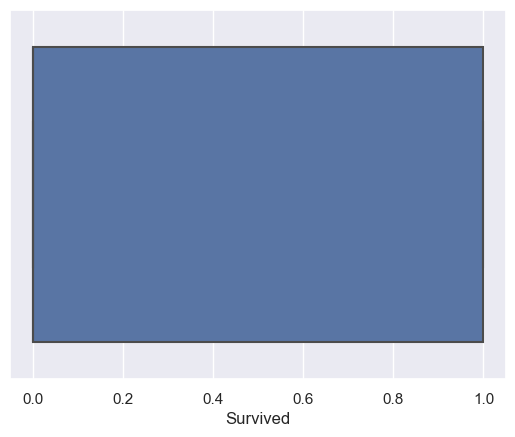

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


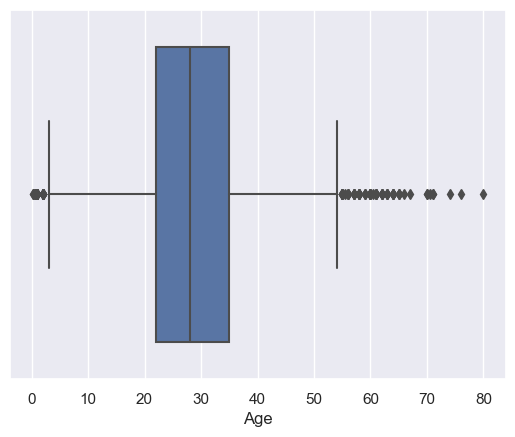

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


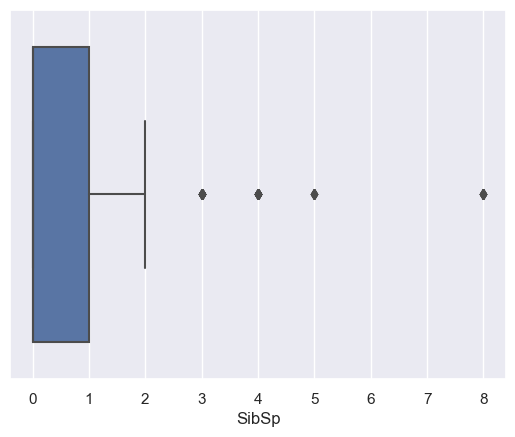

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


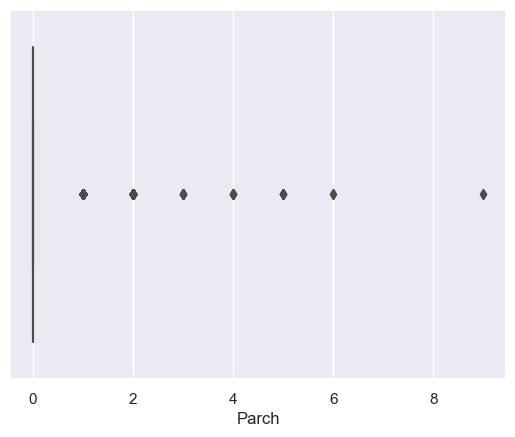

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


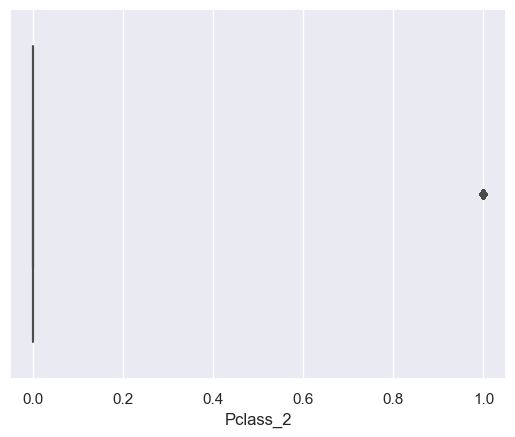

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


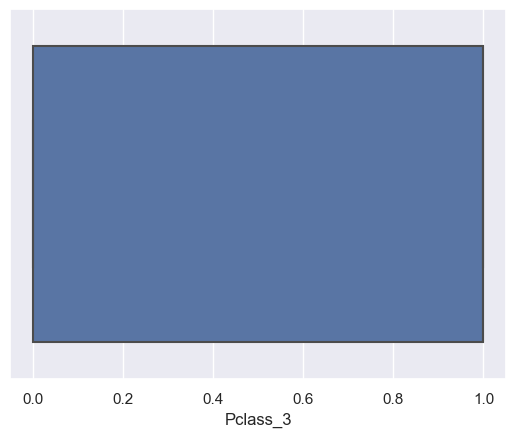

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


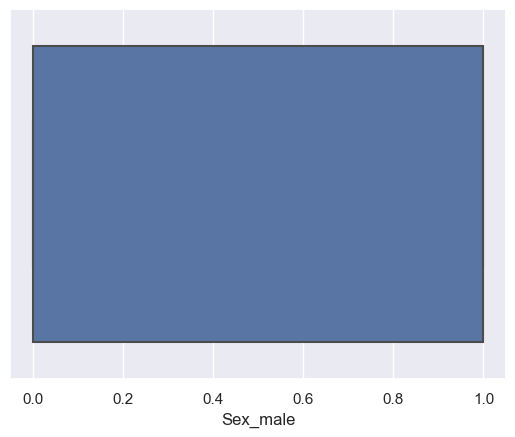

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


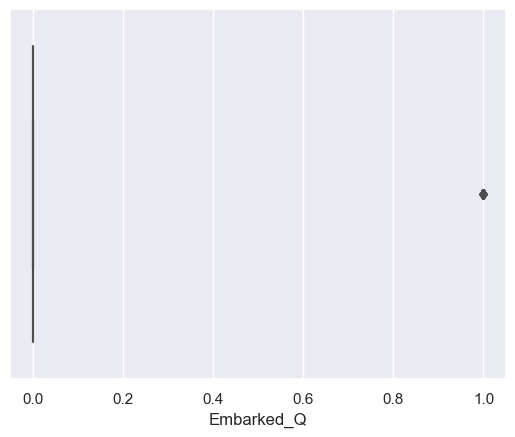

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


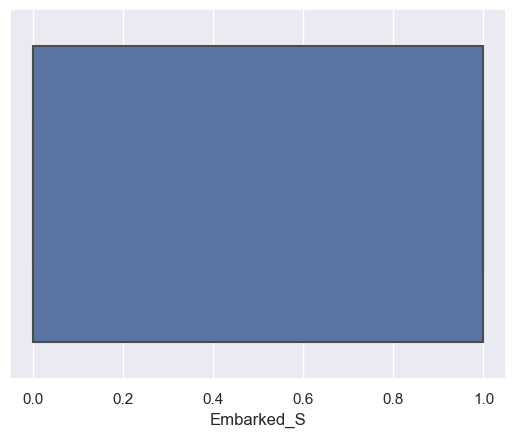

In [75]:
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    boxplots(i)

<AxesSubplot:>

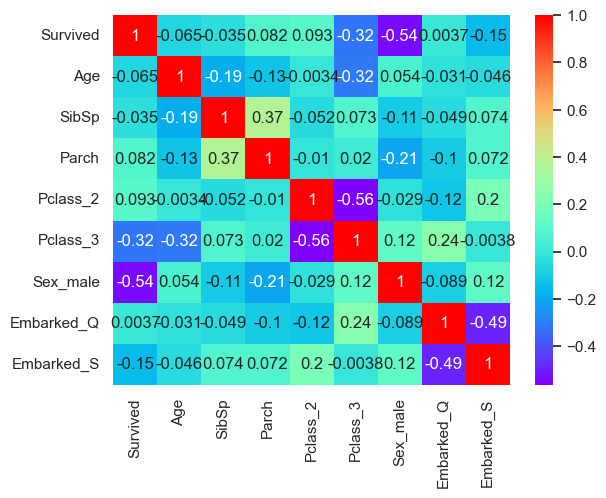

In [76]:
sns.heatmap(all_data.corr(), annot=True, cmap='rainbow')

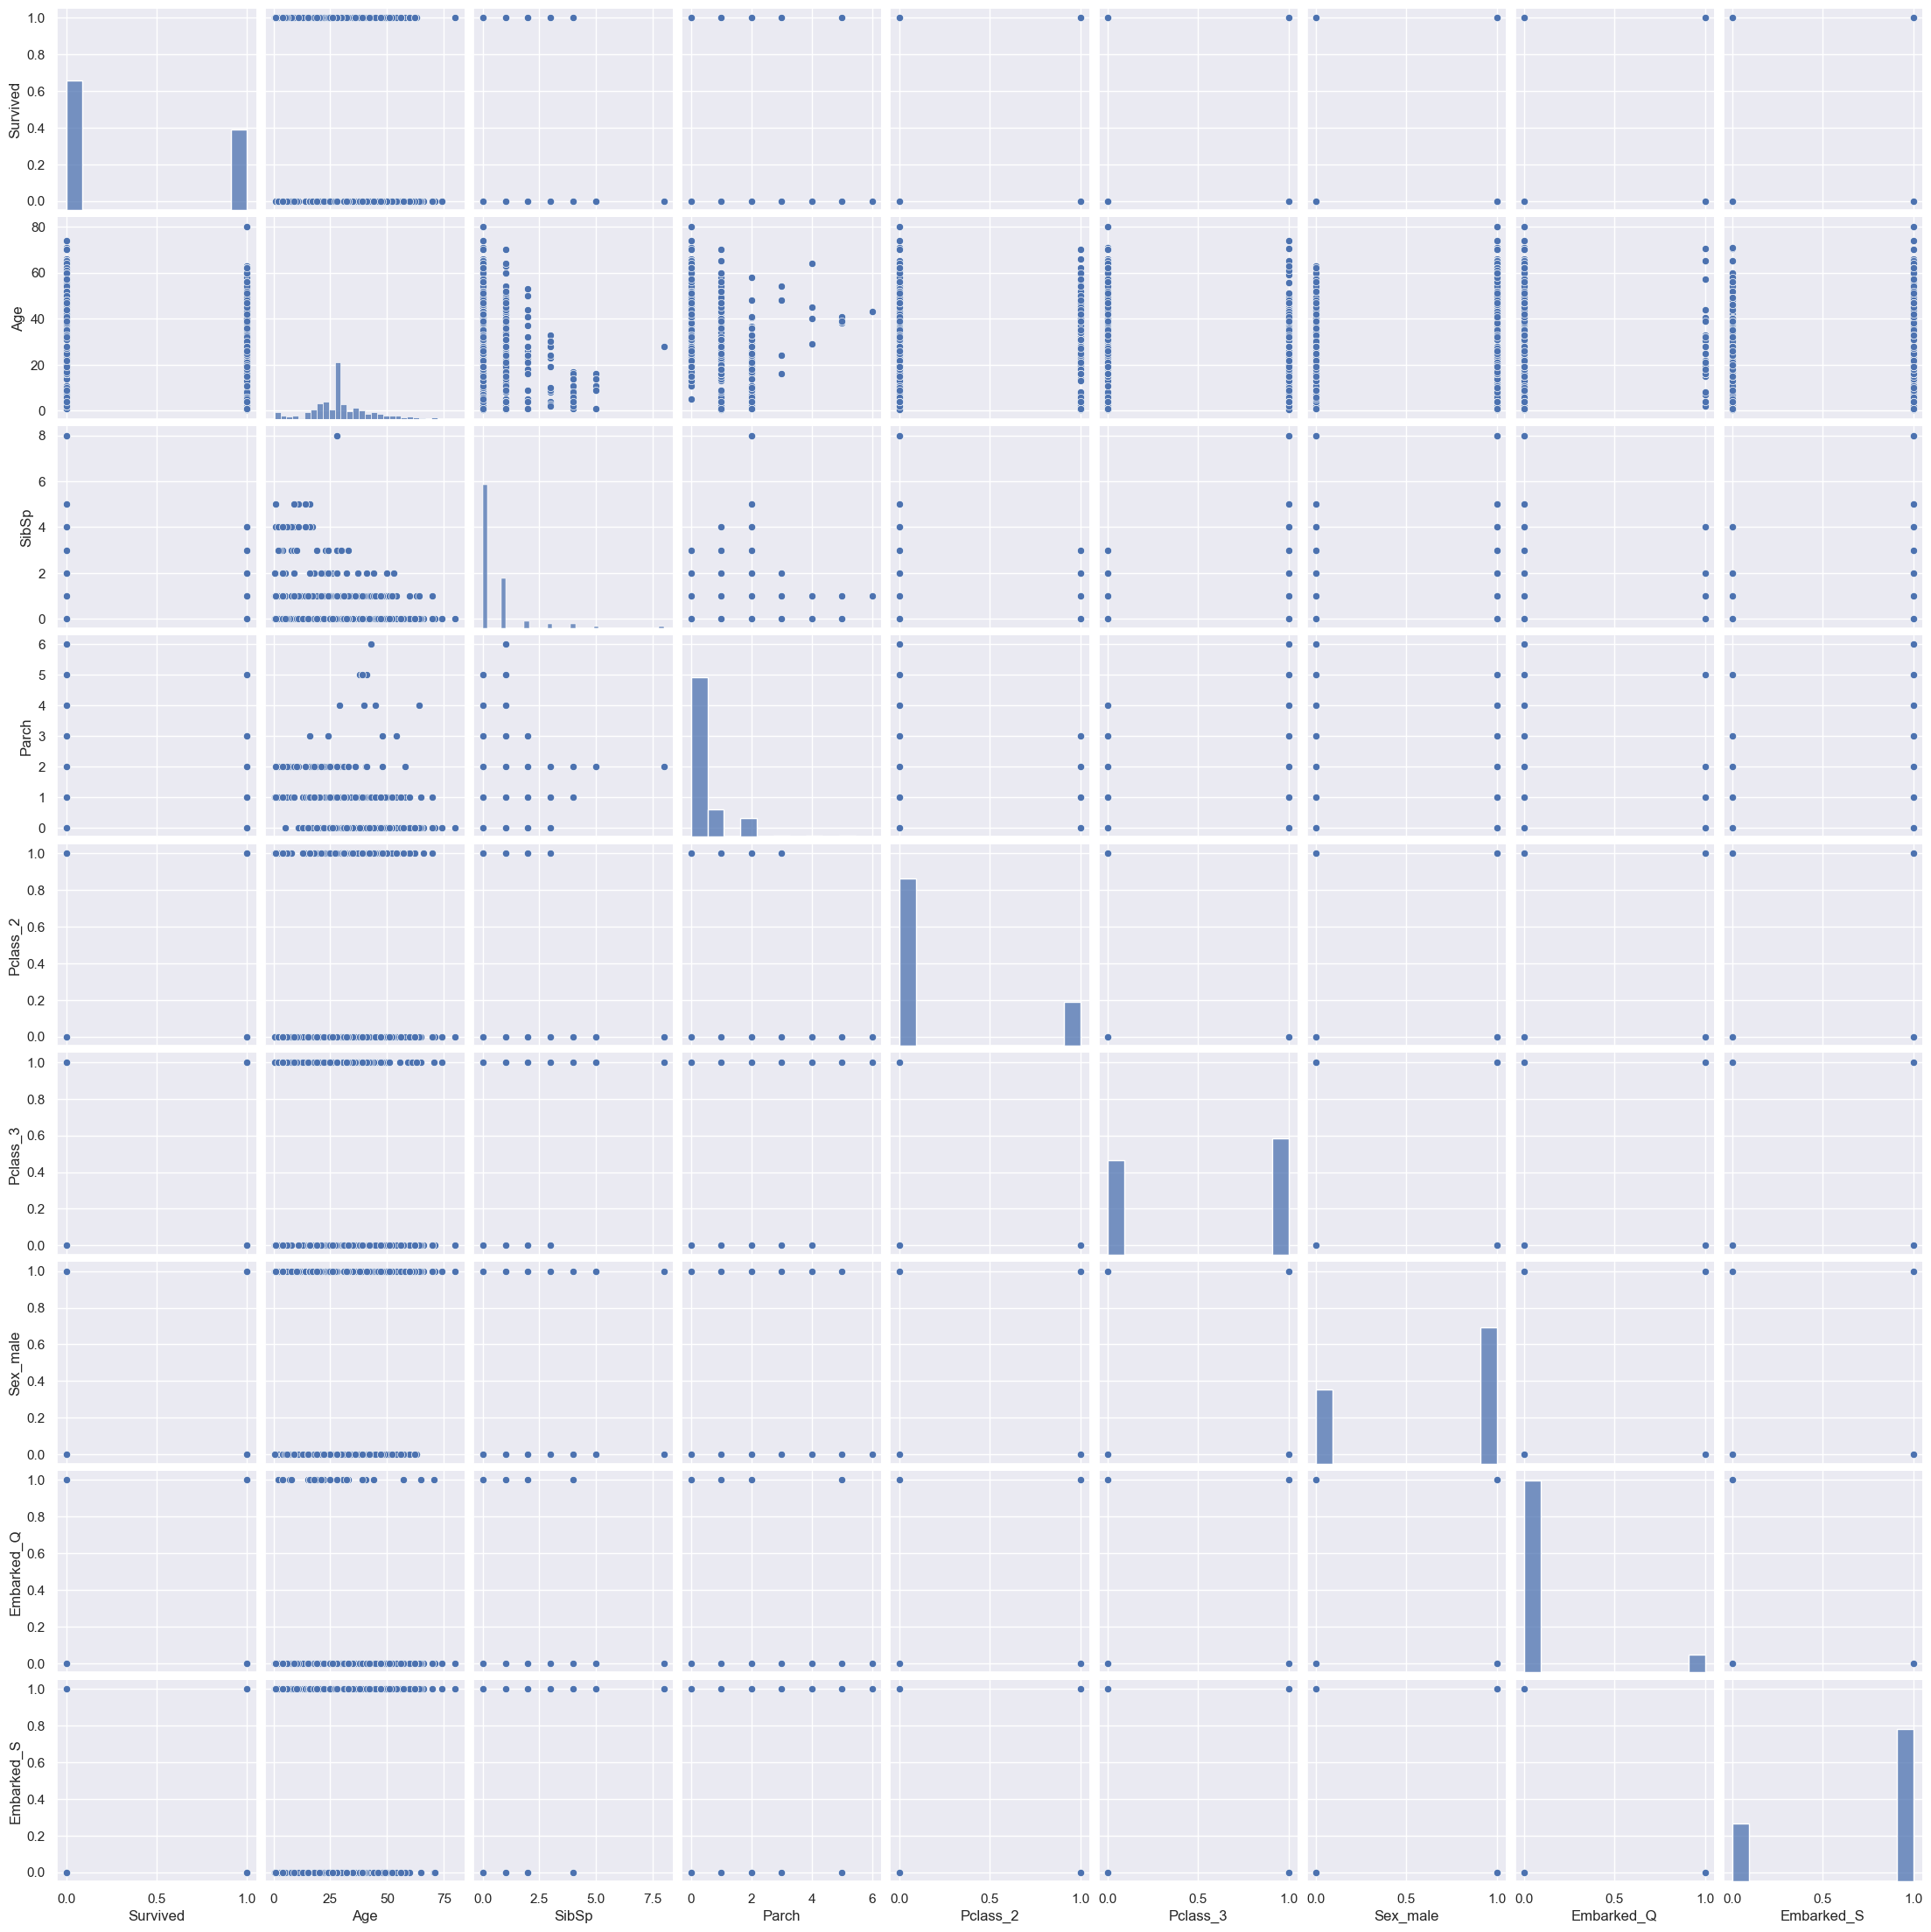

In [78]:
sns.pairplot(train)

# Use pandas profiling - pls do it

In [105]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [82]:
# Split the data into training and test
# Training for building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [112]:
x_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
331,45.5,0,0,0,0,1,0,1
700,18.0,1,0,0,0,0,0,0
748,19.0,1,0,0,0,1,0,1
751,6.0,0,1,0,1,1,0,1
481,28.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
154,28.0,0,0,0,1,1,0,1
454,28.0,0,0,0,1,1,0,1
879,56.0,0,1,0,0,0,0,0
771,48.0,0,0,0,1,1,0,1


In [83]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Building Logistic Regression Model 

In [84]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# Predict result
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [95]:
y_test

331    0.0
700    1.0
748    0.0
751    1.0
481    0.0
      ... 
154    0.0
454    0.0
879    1.0
771    0.0
466    0.0
Name: Survived, Length: 179, dtype: float64

In [96]:
y_pred_test

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0.])

# Evaluate the model result

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix


array([[89, 10],
       [24, 56]], dtype=int64)

In [89]:
(89+56)/(89+10+24+56)

0.8100558659217877

In [91]:
print("classification_report")
print(classification_report(y_test, y_pred_test))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.85      0.70      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [92]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Training Accuracy 0.8089887640449438
********************************************************************************
Test Accuracy 0.8100558659217877


In [109]:
# how to improve my model
# cross validation score - K_FOLD method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_test, y_test, cv =20)
accuracy

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.77777778, 0.77777778, 1.        , 0.88888889, 0.88888889,
       0.88888889, 0.66666667, 0.66666667, 0.66666667, 0.77777778,
       0.77777778, 0.66666667, 0.66666667, 0.77777778, 0.77777778,
       0.88888889, 0.88888889, 0.66666667, 0.88888889, 1.        ])

In [110]:
print("Avg Accuracy after doing 20 split", accuracy.mean())
print("*******************")
print("Best Accuracy", accuracy[2])

Avg Accuracy after doing 20 split 0.7999999999999999
*******************
Best Accuracy 1.0


# ROC-AUC

In [114]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7994949494949495

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

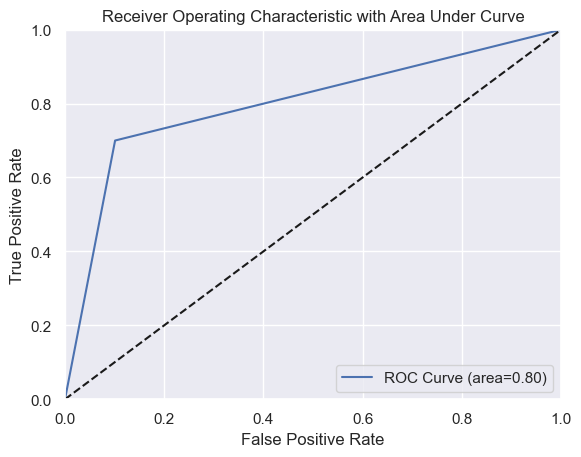

In [117]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [97]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [104]:
y1

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [100]:
# Last part, we have to predict test data (whether customer will survived or not) where we don't have dv 
final_result = logit_model.predict(x1)

In [101]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [102]:
fial_report = pd.concat([x1, pd.DataFrame(final_result)], axis=1)

In [103]:
fial_report

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,0
0,34.5,0,0,0,1,1,1,0,0.0
1,47.0,1,0,0,1,0,0,1,0.0
2,62.0,0,0,1,0,1,1,0,0.0
3,27.0,0,0,0,1,1,0,1,0.0
4,22.0,1,1,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,0,1,1,0,1,0.0
414,39.0,0,0,0,0,0,0,0,1.0
415,38.5,0,0,0,1,1,0,1,0.0
416,28.0,0,0,0,1,1,0,1,0.0


# Home work - https://www.kaggle.com/competitions/spaceship-titanic/data